In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kernels_compare.csv')
df

,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,...,basic-LZMA,basic-XZ-bzImage,basic-XZ-vmlinux,basic-XZ,basic-LZO-bzImage,basic-LZO-vmlinux,basic-LZO,basic-LZ4-bzImage,basic-LZ4-vmlinux,basic-LZ4
0,64241544,6726608,8811992,6580441,10433488,12518312,6167633,5346256,7431120,5209210,...,5208729,4658128,6743416,4513672,7406544,9491320,7271280,7934928,10020016,7785838
1,19940368,5923792,8008824,5777596,9806800,11891280,5542710,4867024,6951536,4732426,...,4733254,4584400,6669344,4438492,6484944,8569368,6351535,6910928,8995672,6768096
2,71333792,19477968,21562832,19330498,23315920,25400232,19048370,15455696,17540048,15318660,...,15321489,13985232,16070008,13838152,21497296,23581560,21362418,23229904,25314480,23081584
3,21332760,6435280,8521168,6286457,10260944,12346280,5996450,5353936,7439312,5215954,...,5207735,5099984,7185784,4953324,6967760,9053048,6831791,7373264,9458864,7226070
4,37729360,7644624,9729488,7496165,11322832,13407144,7055147,6264272,8348624,6127704,...,6132762,5952976,8037752,5807864,8308176,10392440,8172680,8787408,10871984,8636966
5,18841496,5227984,7312848,5079112,9201104,11285416,4933185,4380112,6464464,4240870,...,4242358,4183504,6268280,4036280,5666256,7750520,5529228,6018512,8103088,5871896
6,44515312,9053136,11138512,8904485,12825552,14910376,8561567,7345104,9429968,7207174,...,7209736,6919120,9004408,6772424,9950160,12034936,9813482,10593232,12678320,10443743
7,49942504,14102480,16188536,13958817,17235920,19321424,12973213,11182032,13267568,11049768,...,11052079,9711568,11797536,9569112,15478736,17564184,15347026,16494544,18580312,16349341
8,23038856,4129744,6214776,3985622,8147920,10232400,3886060,3437520,5522032,3300618,...,3299910,3273680,5358624,3128692,4522960,6607384,4391008,4805584,6890328,4660103
9,27424000,7394768,9479288,7248609,11339216,13423184,7075533,6067664,8151664,5932587,...,5931776,5756368,7840800,5610376,8099280,10183192,7965638,8639952,10724184,8493275


In [3]:
compression = ["GZIP","BZIP2","LZMA","XZ","LZO","LZ4"]
diff = {}

In [4]:
vmlin = {}
vmlin["vmlinux"] = df['vmlinux'] - df['basic-vmlinux']

diff["vmlinux"] = vmlin
#print("diff: " + str(diff))

In [5]:
bzDic = {}
for c in compression:
    bzDic[c] = df[c + '-bzImage'] - df['basic-' + c + '-bzImage']
#print("bzImage dic :\n" + str(bzDic))

diff["bzImage"] = bzDic
#print("diff: " + str(diff))

In [6]:
vmDic = {}
for c in compression:
    vmDic[c] = df[c + '-vmlinux'] - df['basic-' + c + '-vmlinux']
#print("vmlinux dic : " + str(vmDic))

diff["compressed-vmlinux"] = vmDic
#print("diff: " + str(diff))

In [7]:
compress = {}
for c in compression:
    compress[c] = df[c] - df['basic-' + c]
#print("compress dic : " + str(compress))

diff["vmlinux.bin"] = compress
average = {}

In [8]:
for k in diff:
    tmp = 0
    size = -1
    for keys,value in diff[k].items():
        if size == -1:
            size = len(diff[k][keys].keys())
        tmp += value
    tmp = tmp / size
    average[k] = tmp

In [9]:
print("diff : \n" + str(diff))
print("\n")
print("average : \n" + str(average))

diff : 
{'vmlinux': {'vmlinux': 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16      -48
17        0
18        0
19        0
20       40
21        0
22       80
23        0
24        0
25    -4720
26        0
27   -16936
28     -112
29        0
      ...  
59        0
60     8912
61      360
62        0
63     -176
64        0
65        0
66        0
67        0
68        0
69        0
70      -72
71        0
72      -72
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83        0
84        0
85        0
86        0
87   -10384
88        0
Length: 89, dtype: int64}, 'bzImage': {'GZIP': 0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17

In [10]:
s = ""
for k,v in average.items():
    tmp = 0
    for i in v:
        tmp += i
    tmp = tmp/len(v)
    s += k + " has an average difference of : " + str(abs(tmp)) + ' in Bytes\n'
print(s[:-1])

vmlinux has an average difference of : 2.0371165256912014 in Bytes
bzImage has an average difference of : 17.581618482514838 in Bytes
compressed-vmlinux has an average difference of : 17.581618482514838 in Bytes
vmlinux.bin has an average difference of : 17.136472667592475 in Bytes


In [11]:
## Correlation de taille entre vmlinux et gzip
coeff = {}

In [12]:
# Utiliser pearson
for c in compression:
    coeff[c] = df['vmlinux'] / df[c]
print(coeff)

{'GZIP': 0      9.762498
1      3.451326
2      3.690220
3      3.393447
4      5.033155
5      3.709604
6      4.999201
7      3.577846
8      5.780492
9      3.783347
10     4.962845
11     3.520096
12     4.231206
13     5.390211
14     4.587833
15     6.799982
16     3.645767
17     4.034344
18     4.088643
19     3.735414
20     9.176158
21     4.131337
22     3.234355
23     7.098532
24     8.755105
25    23.031445
26     4.817973
27     9.139171
28     3.426971
29     4.486591
        ...    
59     4.131626
60     7.633848
61     3.644219
62     3.494356
63     8.883211
64     3.532356
65     3.751938
66     5.392343
67     4.682896
68     3.333862
69     5.282261
70     4.997113
71     4.749331
72     4.024544
73     4.743126
74     4.743557
75     4.055401
76     4.824912
77     3.253056
78     4.010967
79     6.088965
80     3.897252
81     4.161914
82     3.715140
83     4.676096
84     5.104949
85     3.146462
86     4.280887
87     8.717264
88     6.343243
Length: 89, dty

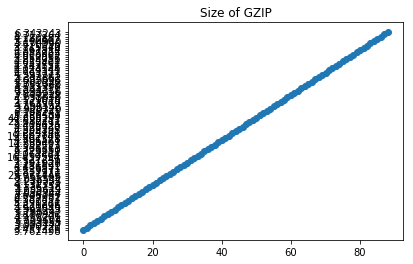

In [13]:
X = coeff["GZIP"].to_string(index=False).replace(" ", "").split("\n")
Y = [i for i in range(len(coeff['GZIP']))]
plt.scatter(Y,X)
plt.title("Size of GZIP")
plt.show()